In [15]:
# dual origins, no dough, data system operation, acceleration 

import sys
print('\nHello, Jupyter Notebook fans! I am running Python {}!'.format(sys.version_info[0]))
print('\nRunning on a T2-Large EC2 instance on the Amazon Web Services public cloud.\n')


Hello, Jupyter Notebook fans! I am running Python 3!

Running on a T2-Large EC2 instance on the Amazon Web Services public cloud.



**pro forma abstract**

> There is a growing demand from UW faculty for research-aligned computing environments for coursework; including statistics, big data methods, data management, and high performance computing. This session will describe our early progress on the public cloud with emphasis on the strengths of JupyterHub, kubernetes and Python and explore the rapidly expanding ecosystem of cloud services and technologies.

# By Jupyter


## Narrative

Include [links to things](https://en.wikipedia.org/wiki/Global_Ocean_Data_Analysis_Project)...


...equations $\Large{\;\;\;\;e^{i\theta}+1=0}$...

...citations...

> Hosseinzadeh, P., Bhardwaj, G., Mulligan, V.K., Shortridge, M.D., Craven, T.W., Pardo-Avila, F., Rettie, S.A., Kim, D.E., Silva, D.A., Ibrahim, Y.M. and Webb, I.K., 2017. Comprehensive computational design of ordered peptide macrocycles. **Science**, 358(6369), pp.1461-1466.


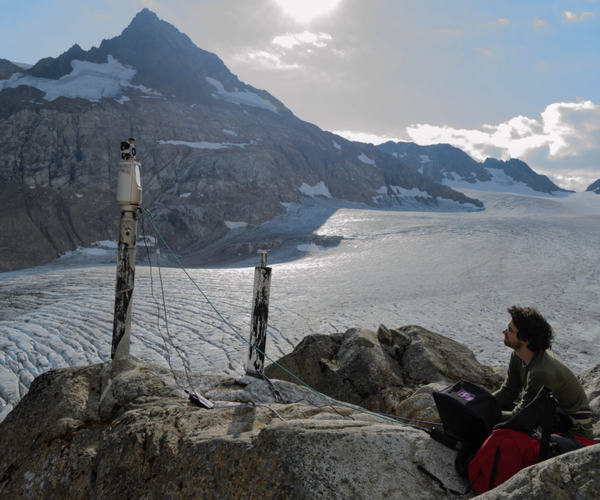

In [16]:
# images
import kilroy
kilroy.Show('landscape','David_Shean_using_UW_terrestrial_laser_scanner_at_South_Cascade_Glacier.png', 600,500)

*David Shean just prior to being rescued by eagles.*

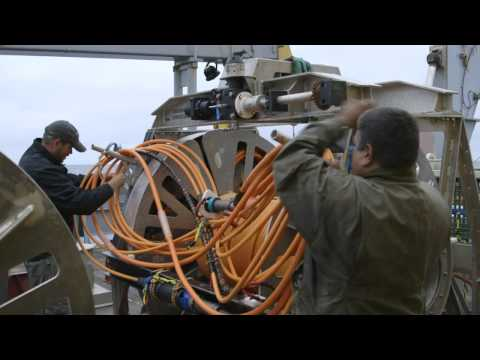

In [17]:
# Video content from YouTube
from IPython.display import YouTubeVideo
YouTubeVideo('MLM0fjy8Vz8')
# https://youtu.be/G0DCb3lH_uU

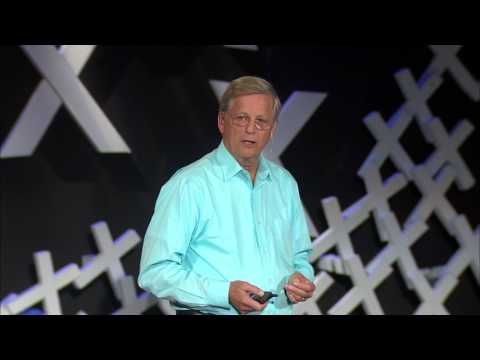

In [18]:
# On the sounds of the ocean including diel vertical migration or DVM
YouTubeVideo('HdHW77blulg')

### ...make movies from data

In [19]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./mymovie.mp4" type="video/mp4">
</video></div>

In [1]:
import IPython
IPython.display.Audio("Hydrophone_example.mp3")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


No whale calls though :( 

```
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
```

# Data sources

* [Heidi Sosik's Imaging Flow Cytometer (WHOI)](http://ifcb-data.whoi.edu/mvco)
  * [Same but API-specific](http://ifcb-data.whoi.edu/api)
* [BCO-DMO (WHOI)](https://www.bco-dmo.org/data)
* ARGO
  * [GitHub pyARGO](https://github.com/castelao/pyARGO) Rob is not convinced this is complete enough to be useful...
  * [UCSD ARGO Informational FAQ](http://www.argo.ucsd.edu/Data_FAQ.html#RorD)
  * [Coriolis map-based data selection tool](http://www.argodatamgt.org/Access-to-data/Argo-data-selection)
  * [xarray lesson that works with ARGO data](https://rabernat.github.io/research_computing/xarray.html)
* GLODAP
* AQUA
* TERRA
* OOI CA CI
* ECCO2
* LIVE OCEAN
* NANOOS

### So to conclude

- Jupyter notebooks can be managed as open source narratives 
  - Python
  - Community


Oceanography


microphones, sonar, chemistry, temperature, oxygen, pH, seismics, cameras...



#### This notebook will persist on GitHub

- utility code
- images, videos, audio, links, citations
- invoke software packages
- cloud (relax you're in it already)
- local file system
- Deconstruct 
- Widget display

## Tech versus Solution


- Azure and Google both push **hosted environments**
- Making those work can beat learning...
  - Anaconda
  - Kubernetes
  - HELM
  - KOPS
  - Docker / DockerHub
  - git / GitHub


In [21]:
# To run this notebook: pandas, netcdf4, xarray and boto must be installed (terminal or via !)
# !conda install netcdf4 -y
# !conda install xarray -y 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import boto
from boto.s3.key import Key
import xarray as xr

# This cell copies a glodap salinity file to the local directory, naming it 'glodap_salinity.nc'
connection = boto.connect_s3(anon=True)
bucket = connection.get_bucket('himatdata')
data_dir = '/data/glodap/'

# This block of bespoke-y code prints all the root directory names from the AWS S3 'himatdata' bucket
dir_list = []
for key in bucket.list():
    keyname = str(key.name.encode('utf-8'))
    if '/' in keyname:
        cd = keyname.split('/')[0].strip("b'").strip('b"')
        if cd not in dir_list:
            dir_list.append(cd)
            print(cd)

print('\n')

# Now let's list all the contents of that glodap directory
file_list = []
for key in bucket.list():
    keyname = str(key.name.encode('utf-8'))
    if 'glodap/' in keyname:
        cd = keyname.strip("b'").strip('b"')
        print(cd)

print('\n')
for key in bucket.list(): 
    filename = key.name.encode('utf-8')
    if b'glodap' in filename: 
        if b'salinity.nc' in filename: 
            print ('salinity file is', filename)
            salinityfilename = filename
        if b'temperature.nc' in filename: 
            print ('temperature file is', filename)
            temperaturefilename = filename
        if b'oxygen.nc' in filename: 
            print('oxygen file is', filename)
            oxygenfilename = filename            

local_salinity_filename = data_dir + 'glodap_salinity.nc'
local_temperature_filename = data_dir + 'glodap_temperature.nc'
local_oxygen_filename = data_dir + 'glodap_oxygen.nc'

print('\n')
!ls -al /data/glodap/*.nc

In [ ]:
# This Python code copies three data files from the AWS cloud to the local file system
# k = Key(bucket)
# k.key = salinityfilename
# k.get_contents_to_filename(local_salinity_filename)
# k.key = temperaturefilename
# k.get_contents_to_filename(local_temperature_filename)
# k.key = oxygenfilename
# k.get_contents_to_filename(local_oxygen_filename)

# If this works you should see three 100MByte files listed
# !ls -al /data/glodap/glodap_*.nc

# Deconstruction

In [23]:
# This code assigns our data files to three distinct dataset objects
print (local_salinity_filename)
dsSal = xr.open_mfdataset(local_salinity_filename)
dsTemp = xr.open_mfdataset(local_temperature_filename)
dsO2 = xr.open_mfdataset(local_oxygen_filename)
dsO2          # This prints the structure of the oxygen dataset below

/data/glodap/glodap_salinity.nc


<xarray.Dataset>
Dimensions:        (depth_surface: 33, lat: 180, lon: 360, snr: 1)
Coordinates:
  * lon            (lon) float64 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5 ...
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
Dimensions without coordinates: depth_surface, snr
Data variables:
    oxygen         (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    oxygen_error   (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_mean     (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_std      (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    Input_N        (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    oxygen_relerr  (depth_surface, lat, lon) float64 dask.array<shape=(33, 180, 360), chunksize=(33, 180, 360)>
    SnR 

## Tears of frustration (breadcrumbs)


Above some **Attributes** are truncated. I skip over the 'thrashing' (like dsO2['Attributes']['Description']) 
and cut to the chase: xarray Dataset **Attributes** print nicely as follows:

```
print(dsO2.Description)
print(dsO2.Citation)
```

But what are the units of dissolved oxygen? Upon reflection it would make sense to associate units 
directly with the data. I use the 'dir' Python directory function to break down the Dataset into components. 
Indeed dsO2 (as a Dataset) has a component called oxygen which in turn has a sub-component called units...

In [24]:
# print(dsO2.Comment) # garbled text. Norwegian?
# print('\n')
print(dsO2.Description)             # The description is fine as far as it goes but does not indicate units.
print('\n')
print(dsO2.Citation)

# Run the 'directory' operation on dsO2 to find oxygen; on dsO2.oxygen to find units; then...
#dir(dsO2.oxygen.units)

# print units
print("\n" + dsO2.oxygen.units)

1 X 1 global mapped field of dissolved molecular oxygen from the GLODAPv2 data product. Mapping is performed using the DIVA software (Troupin et al., 2012). Error fields are calculated using the clever poor mans error calculation method in DIVA (Beckers et al., 2014). The error fields represent the mapping error only, and does not include measurement or calculation uncertainties in the input data.


Cite as: Lauvset, Siv K., Key, Robert M., Olsen, Are, van Heuven, Steven, Velo, Anton, Lin, Xiaohua, Schirnick, Carsten, Kozyr, Alex, Tanhua, Toste, Hoppema, Mario, Jutterstrom, Sara, Steinfeldt, Reiner, Jeansson, Emil, Ishii, Masao, Perez, Fiz F., Suzuki, Toru, and Watelet, Sylvain: A new global interior ocean mapped climatology: the 1x1 GLODAP version 2, Earth Syst. Sci. Data. Discuss., doi:10.5194/essd-2015-43, in review, 2016.

micro-mol kg-1


What about the Python **inspect** module? Let's give that a whirl...

In [29]:
import inspect
print(inspect.getdoc(dsO2))

A multi-dimensional, in memory, array database.

A dataset resembles an in-memory representation of a NetCDF file, and
consists of variables, coordinates and attributes which together form a
self describing dataset.

Dataset implements the mapping interface with keys given by variable names
and values given by DataArray objects for each variable name.

One dimensional variables with name equal to their dimension are index
coordinates used for label based indexing.


# Widget Visualization

In [9]:
# This code indexes into the Oxygen dataset and prints a few example oxygen values
dsO2['oxygen'][0:2,90:92,120:122].values   # a few dissolved oxygen values near the surface

array([[[ 197.85690308,  196.35029602],
        [ 197.01686096,  195.4756012 ]],

       [[ 197.91693115,  196.32531738],
        [ 197.07067871,  195.68740845]]])

In [10]:
print(dsTemp['temperature'][0,20:24,160:200].values.mean())
print(dsTemp['temperature'][0,80:100,160:200].values.mean())
# dir(dsTemp['temperature'][0,170:174,320:324].values.mean)

-0.531661301581
28.092354033


In [11]:
# These imports give us control sliders that we use for selecting depth slices from the dataset
from ipywidgets import *
from traitlets import dlink

# This creates a 2D color-coded view of oxygen at the surface, attaching a slider to a depth parameter
def plotOxygen(depth_index):
    a=dsO2['oxygen'].sel(depth_surface = depth_index)
    a.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=150, vmax=350)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(28, 50, 'oxygen dissolved in', fontsize = '20')
    plt.text(28, 42, '     ocean water   ', fontsize = '20')

# This is the interactive slider
interact(plotOxygen, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))

A Jupyter Widget

<function __main__.plotOxygen>

In [12]:
def plotSalinity(depth_index):
    b = dsSal['salinity'].sel(depth_surface = depth_index)
    b.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=33, vmax=36)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(47, 50, 'salinity of', fontsize = '20')
    plt.text(47, 42, 'ocean water', fontsize = '20')
    
interact(plotSalinity, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))

A Jupyter Widget

<function __main__.plotSalinity>

In [25]:
def plotTemperature(depth_index):
    c=dsTemp['temperature'].sel(depth_surface = depth_index)
    c.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=0, vmax=23)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(47, 50, 'temperature of', fontsize = '20')
    plt.text(47, 42, 'ocean water', fontsize = '20')

interact(plotTemperature, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))   

A Jupyter Widget

<function __main__.plotTemperature>

In [ ]:
# This code pulls out the various available depths (in meters) of the dataset indexed slices
print (dsTemp['Depth'].values[10])
print ('    ')
print (dsTemp['Depth'].values)

# Transit to Curriculum

- Moby runs on AWS T2-Large (cheap!)
- This Jupyter Hub is useful to **research** ~ marina. 
- Now Faculty must teach classes of $N = (2 - 5000)$ 
- Requirements:
  - Each of N > URL > NetID
  - They “arrive” at a website pre-populated 
  - They start and can start modifying notebooks, upload files, etcetera
  - Scikit-learn already installed, NetworkX, boto, NetCDF4, ...
  - My students will need access to 
    - NVIDIA GPUs for their deep neural net lesson
    - (small) cluster for their HPC lesson
    - $
    - NOT: other students’ work
  - No student credit cards
  - I can grade my students’ work 
  - 5 TB of data... 
  - When my student accidentally deletes everything...
  - My students never have to wait more than 2 minutes to access their Server
  - I need to update half-way through the course
  - How To Pay For This???
  - My total cost to run this course should be as low as possible

# Combine

The public cloud { one of AWS, Google Cloud, Azure }
Scaling technologies { docker, DockerHub, kubernetes, KOPS, HELM, please advise }
Replication technologies { JupyterHub, GitHub, nbgitpuller, please advise } 
Storage {Each user has a persistent disk space or use EFS (unstable) or use buckets on Google }
Programming language including package manager { Python 3, Anaconda }
Authentication, OAuth through Github, Google etc. 

The faculty/instructor gets access to a cloud-hosted Jupyter notebook and begins installing tools and creating notebooks
Much of this is the domain of the eScience Institute
A consultant (ATL) configures the JHub
A miracle happens (please elaborate)
The students pop laptops at the first class and log in, learn the ropes
Here is how the instructor grades the first assignment...
After three weeks one student notices some graffiti on a wall and decides to see what it does: ‘rm -r *’
Two days before the final project is due 79 students simultaneously jump into their notebooks and begin spinning up clusters… here is what happens…’


AT’s notes: Merge as see fit 

Two traditional ways of a Jupyterhub deployment: 

(a) a single giant server where packages and environments are installed directly onto the machine via pip install or conda install. Pros: easy to set up, can quickly install packages as the need arises. Cons: works for small groups, on work that are not memory/compute intensive. 

(b) scalable using a container management and load balancing.  Container management = Docker + Kubernetes + Helm + KOPS... Pros: scalable, can accommodate a large number of participants. Cons: uses docker images to create environments, therefore needs a longer lead time to ensure all packages, libraries and dependencies are installed; not feasible to do things on the fly 

Installation/setup requirements: 

For (a) provision a large server - say one with 48 cpus and 192 GB memory. Follow the steps outlined in https://jupyterhub.readthedocs.io/en/latest/installation-guide.html to install jupyterhub. Thereafter, packages and libraries can be installed on the server using the traditional pip install or conda install. This will propagate as “kernels” on Jupyterhub. Each user is assigned a home directory on the server which corresponds to their login username (i.e. if Github is the authentication mechanism, then the home directories should correspond exactly to the Github username)

For (b), the installation and setup are outlined in https://zero-to-jupyterhub-with-kubernetes.readthedocs.io/en/latest/

The fundamental idea here is that instead of having a giant server sitting on standby, the number of servers can be scaled up or down as required. Four main technologies used in this version of deployment:

Kubernetes which is a manager for the deployment and scaling of containers. Kubernetes clusters are the foundation of the scalable Jupyterhub ecosystem -- it consists of a master node where the Jupyterhub spawner resides and worker nodes where “pods” or docker containers are spawned. 

Kubernetes clusters are provisioned on Google Cloud Platform using its native API, Azure using Azure container services and AWS using two methods - KOPS (Kubernetes operations service) or a quickstart Heptio Template. KOPS autoscales while deployment of kubernetes clusters using the Heptio template does NOT autoscale. 


Once the kubernetes cluster is provisioned, the kubernetes command tool (kubectl) needs to be installed in order to interact the kubernetes cluster. The distinction between kubectl and kubernetes management tools like KOPs is that kubectl cannot provision a kubernetes cluster. It is mainly used to issue commands TO a pre-made kubernetes cluster.  Kubectl helps you get cluster information like node IPs and # of pods or to figure out if something went wrong with your kubernetes cluster. 
Jupyterhub is installed on the kubernetes cluster using helm. Helm is an application manager for kubernetes. 
Once a user logs on to your scalable Jupyterhub, a “pod” starts up. What a pod is, is essentially a docker container. Jupyterhub pulls a docker image from an image that you have created; this image contains all your packages and libraries that you want to use for your class. The path to this image is specified in a configuration file while installing Jupyterhub via helm. This docker image can also contain *some* data though not encouraged to be large datasets. 

so you do a a helm install jupyterhub
to actually install jupyterhub on the kubernetes cluster

Additional technology to understand: Docker

Things to consider: You can specify how much CPU, memory and disk space to allocate to each user. This will factor into the size and number of machines you choose. For example, let’s say you have 150 students in your course and each student will be using 4 cpus and 6GiB of memory. This will mean that your maximum cluster size should be about 17 c4.8xlarge instances (on AWS). That will allocate space for about 9 “pods” per instance. 

Ways to democratize the process: (a) we create a deployjhub package that automatically provisions a kubernetes cluster, installs jupyterhub and deploys the docker image. (b) training a teaching assistant to spin up the instance

Adding dimensions names and coordinate indexes to numpy’s ndarray makes many powerful array operations possible:

Apply operations over dimensions by name: x.sum('time').
Select values by label instead of integer location: x.loc['2014-01-01'] or x.sel(time='2014-01-01').
Mathematical operations (e.g., x - y) vectorize across multiple dimensions (array broadcasting) based on dimension names, not shape.
Flexible split-apply-combine operations with groupby: x.groupby('time.dayofyear').mean().
Database like alignment based on coordinate labels that smoothly handles missing values: x, y = xr.align(x, y, join='outer').
Keep track of arbitrary metadata in the form of a Python dictionary: x.attrs.
pandas provides many of these features, but it does not make use of dimension names, and its core data structures are fixed dimensional arrays.